## Data Preprocessing and Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [7]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


In [11]:
## Since the data is already clean, we can proceed with EDA

## Exploratory Data Analysis (EDA)

#### Crude Death Rate = Deaths/Population×100,000 (or per million). 
#### This gives you the proportion of the population that died from COVID-19.

In [77]:
df['Crude Death Rate (per 100K)'] = (df['Deaths'] / df['Population']) * 100000
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population,Crude Death Rate (per 100K)
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618,0.127854
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364,11.465337
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019,44.983504
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492,2765.996998
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376,30.707941


#### Find Top 5 States/UTs by Crude Death Rate

In [37]:
print("Top 5 States/UTs by Crude Death Rate (per 100K)")
top = df.sort_values(by='Crude Death Rate (per 100K)', ascending=False).head()
print(top)

Top 5 States/UTs by Crude Death Rate (per 100K)
            State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
20        Maharashtra      8171048     214     8022276  148558           0.0   
13  Jammu and Kashmir       482023       0      477231    4792           0.0   
8               Delhi      2040910      14     2014230   26666           0.0   
3               Assam       746159       5      738119    8035           0.0   
15          Karnataka      4088769      12     4048399   40358           0.0   

    Discharge Ratio  Death Ratio  Population  Crude Death Rate (per 100K)  
20            98.18         1.82      399001                 37232.488139  
13            99.01         0.99       66001                  7260.496053  
8             98.69         1.31      773997                  3445.232992  
3             98.92         1.08      290492                  2765.996998  
15            99.01         0.99     1711947                  2357.432794  


#### Finding States/UTs with the Lowest Crude Death Rate

In [42]:
print("Bottom 5 States/UTs by Crude Death Rate (per 100K)")
bot = df.sort_values(by='Crude Death Rate (per 100K)').head()
print(bot)

Bottom 5 States/UTs by Crude Death Rate (per 100K)
                                   State/UTs  Total Cases  Active  Discharged  \
7   Dadra and Nagar Haveli and Daman and Diu        11592       0       11588   
0                        Andaman and Nicobar        10766       0       10637   
18                               Lakshadweep        11415       0       11363   
29                                    Sikkim        44927       4       44422   
22                                 Meghalaya        96983       3       95352   

    Deaths  Active Ratio  Discharge Ratio  Death Ratio  Population  \
7        4          0.00            99.97         0.03   231502578   
0      129          0.00            98.80         1.20   100896618   
18      52          0.00            99.54         0.46    11700099   
29     501          0.01            98.88         1.12    83697770   
22    1628          0.00            98.32         1.68    79502477   

    Crude Death Rate (per 100K)  
7      

#### Sort by Death Ratio (Highest First)

In [81]:
print("Top 5 States/UTs by Death Ratio")
top_death_ratio = df.sort_values(by='Death Ratio', ascending=False)
print(top_death_ratio.head())

Top 5 States/UTs by Death Ratio
      State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
27       Punjab       793644    1233      773073   19338          0.16   
24     Nagaland        36033       0       35251     782          0.00   
20  Maharashtra      8171048     214     8022276  148558          0.00   
34  Uttarakhand       452571       0      444803    7768          0.00   
22    Meghalaya        96983       3       95352    1628          0.00   

    Discharge Ratio  Death Ratio  Population  Crude Death Rate (per 100K)  
27            97.41         2.44    34698876                    55.730912  
24            97.83         2.17    38157311                     2.049411  
20            98.18         1.82      399001                 37232.488139  
34            98.28         1.72    85002417                     9.138564  
22            98.32         1.68    79502477                     2.047735  


#### Sort by Death Ratio (Lowest First)

In [83]:
print("Bottom 5 States/UTs by Death Ratio")
bot_death_ratio = df.sort_values(by='Death Ratio', ascending=True)
print(bot_death_ratio.head())

Bottom 5 States/UTs by Death Ratio
                                   State/UTs  Total Cases  Active  Discharged  \
7   Dadra and Nagar Haveli and Daman and Diu        11592       0       11588   
23                                   Mizoram       239560       1      238825   
2                          Arunachal Pradesh        67049       0       66753   
18                               Lakshadweep        11415       0       11363   
31                                 Telengana       844432       8      840313   

    Deaths  Active Ratio  Discharge Ratio  Death Ratio  Population  \
7        4           0.0            99.97         0.03   231502578   
23     734           0.0            99.69         0.31     1308967   
2      296           0.0            99.56         0.44      658019   
18      52           0.0            99.54         0.46    11700099   
31    4111           0.0            99.51         0.49    69599762   

    Crude Death Rate (per 100K)  
7                      

#### Summary Statistics for Crude Death Rate

In [60]:
print("Summary Statistics for Crude Death Rate (per 100K)")
print(df['Crude Death Rate (per 100K)'].describe())

Summary Statistics for Crude Death Rate (per 100K)
count       36.000000
mean      1581.893331
std       6276.185815
min          0.001728
25%          5.280501
50%         52.415062
75%        110.658182
max      37232.488139
Name: Crude Death Rate (per 100K), dtype: float64


#### Summary Statistics for Death Ratio

In [64]:
print("Summary Statistics for Death Ratio")
print(df['Death Ratio'].describe())

Summary Statistics for Death Ratio
count    36.000000
mean      1.097778
std       0.494791
min       0.030000
25%       0.840000
50%       1.065000
75%       1.310000
max       2.440000
Name: Death Ratio, dtype: float64


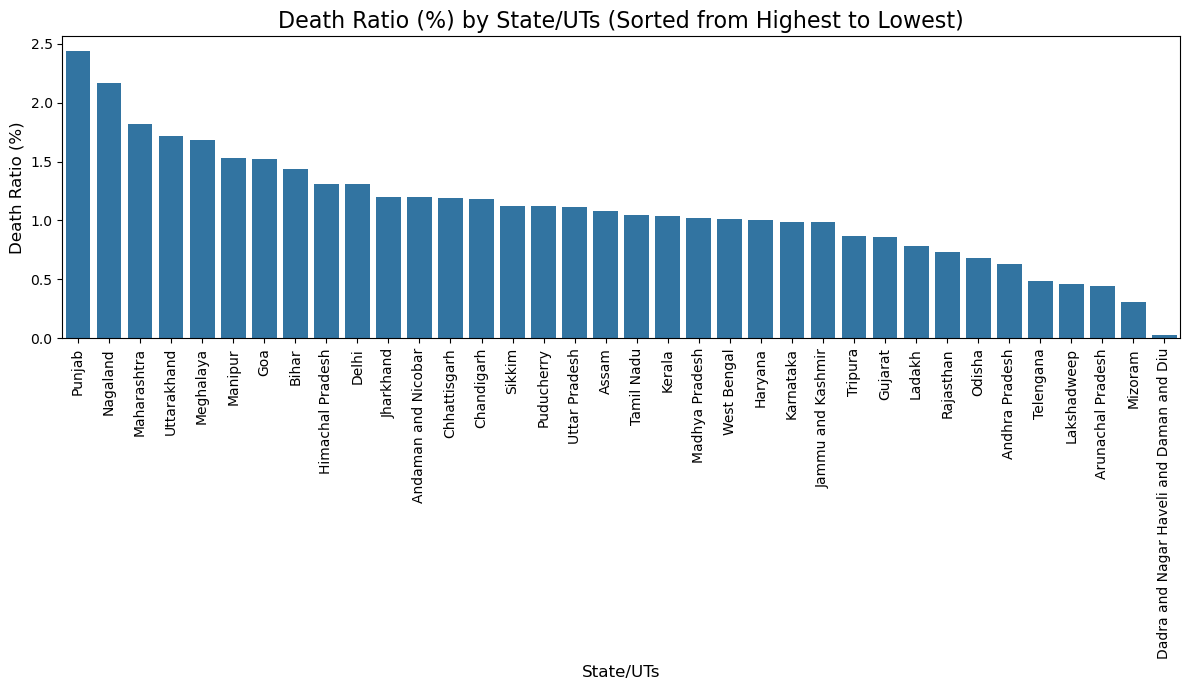

In [88]:
plt.figure(figsize=(12, 7))
df_sorted_death_ratio = df.sort_values(by='Death Ratio', ascending=False)
sns.barplot(x='State/UTs', y='Death Ratio', data=df_sorted_death_ratio)
plt.title('Death Ratio (%) by State/UTs (Sorted from Highest to Lowest)', fontsize=16)
plt.xlabel('State/UTs', fontsize=12)
plt.ylabel('Death Ratio (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Key Findings 1:
##### 1. Maharashtra stands out dramatically with a Crude Death Rate of 37232.49 per 100K. 
##### 2. Dadra and Nagar Haveli and Daman and Diu, Andaman and Nicobar, Lakshadweep, Sikkim, and Meghalaya show very low crude death rates, some extremely close to zero.
##### 3. Mean (1581.89) is vastly different from the Median (52.41). This is a strong indicator that the data for 'Crude Death Rate' is highly skewed and likely contains some extreme outlier values. Maharashtra's rate is pulling the average way up.

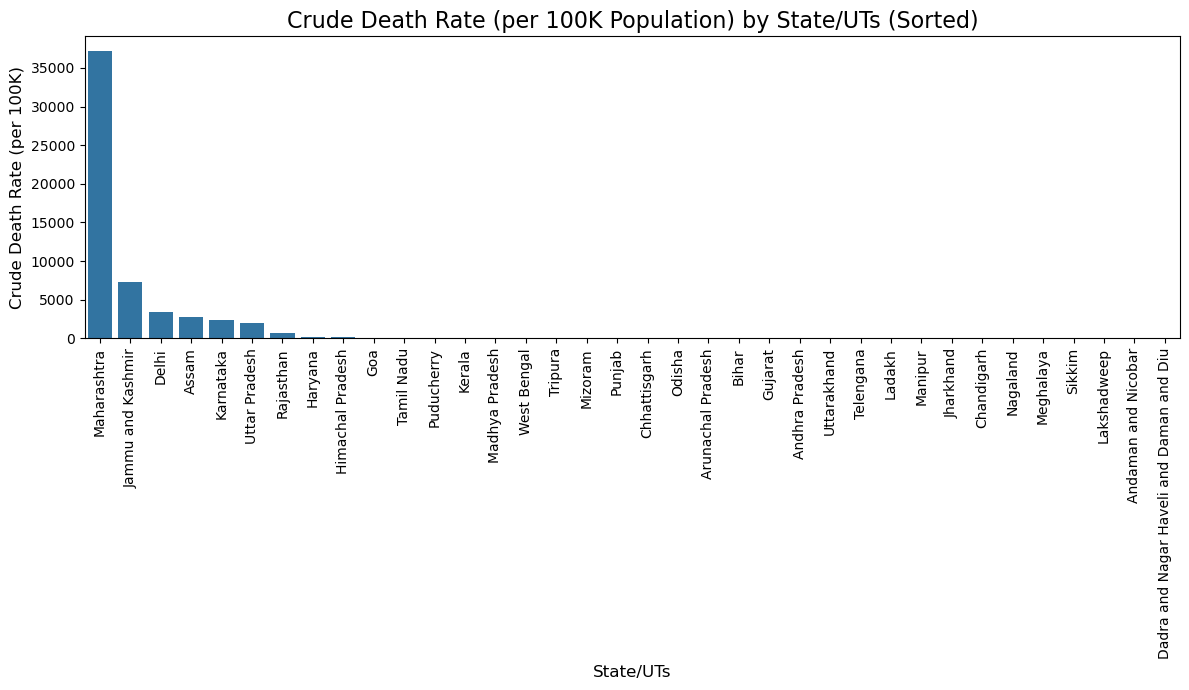

In [90]:
plt.figure(figsize=(12, 7)) 
df_sorted_crude_rate = df.sort_values(by='Crude Death Rate (per 100K)', ascending=False)
sns.barplot(x='State/UTs', y='Crude Death Rate (per 100K)', data=df_sorted_crude_rate)
plt.title('Crude Death Rate (per 100K Population) by State/UTs (Sorted)', fontsize=16)
plt.xlabel('State/UTs', fontsize=12)
plt.ylabel('Crude Death Rate (per 100K)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Key Findings 2:
##### 1. Top 5 States: Punjab (2.44%), Nagaland (2.17%), Maharashtra (1.82%), Uttarakhand (1.72%), Meghalaya (1.68%). These ratios are more in line with what was observed globally during the pandemic (ranging from less than 1% to a few percent).
##### 2. Bottom 5 States: Dadra and Nagar Haveli and Daman and Diu (0.03%), Mizoram (0.31%), Arunachal Pradesh (0.44%), Lakshadweep (0.46%), Telengana (0.49%). These are relatively low, which is a good sign.
##### 3. The mean (1.09) and median (1.065) are very close, and the standard deviation is much smaller. This indicates that the 'Death Ratio' data is much more consistently distributed across states compared to the 'Crude Death Rate'. This is good because the 'Death Ratio' does not depend on the total population, only on confirmed cases and deaths.